In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
data = fetch_california_housing(as_frame=True)
df = data.frame

X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)


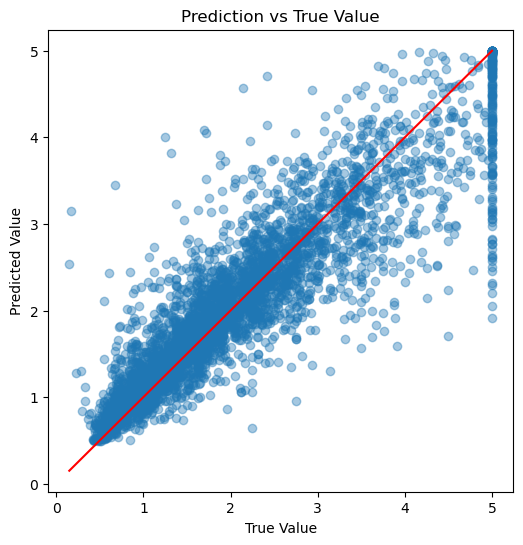

In [3]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red")
plt.xlabel("True Value")
plt.ylabel("Predicted Value")
plt.title("Prediction vs True Value")
plt.show()

从散点图可以看出，大多数样本点分布在对角线附近，说明模型整体预测效果较好，但在高房价区域仍存在一定误差。

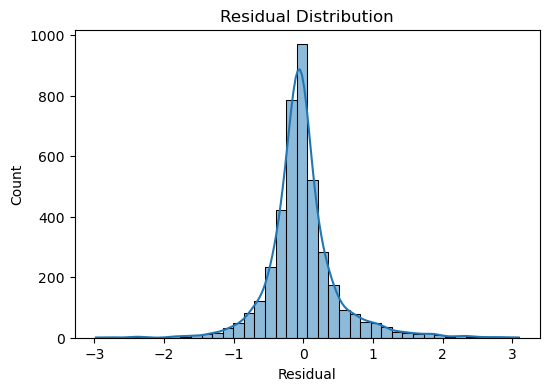

In [4]:
residuals = y_test - y_pred

plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.xlabel("Residual")
plt.title("Residual Distribution")
plt.show()

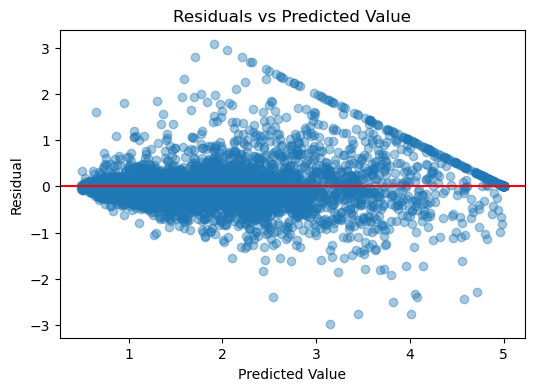

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0, color="red")
plt.xlabel("Predicted Value")
plt.ylabel("Residual")
plt.title("Residuals vs Predicted Value")
plt.show()


残差分布整体呈现近似对称结构，未出现明显偏移，说明模型不存在严重系统性偏差。但在部分预测值较大的区域，残差波动有所增大，表明模型在极端样本上的稳定性仍有提升空间。

In [7]:
from sklearn.metrics import mean_squared_error

rmses = []

for seed in [0, 1, 2, 3, 4]:
    rf = RandomForestRegressor(
        n_estimators=200,
        random_state=seed,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    rmses.append(rmse)

rmses


[np.float64(0.5025832450453748),
 np.float64(0.5019789261629503),
 np.float64(0.5038034658005833),
 np.float64(0.5021528749182881),
 np.float64(0.5043869944799579)]

在不同随机种子条件下，随机森林模型的 RMSE 波动较小，说明模型训练过程较为稳定，对随机初始化不敏感。